# **Data Managment Final Project: City of Austin**


Group 5: Harris Azerf, Timothy Wong, Nadia Florez, Malavika Prasad, Kinjal Doshi


# Transaction Management Applications

## Weather

### Model

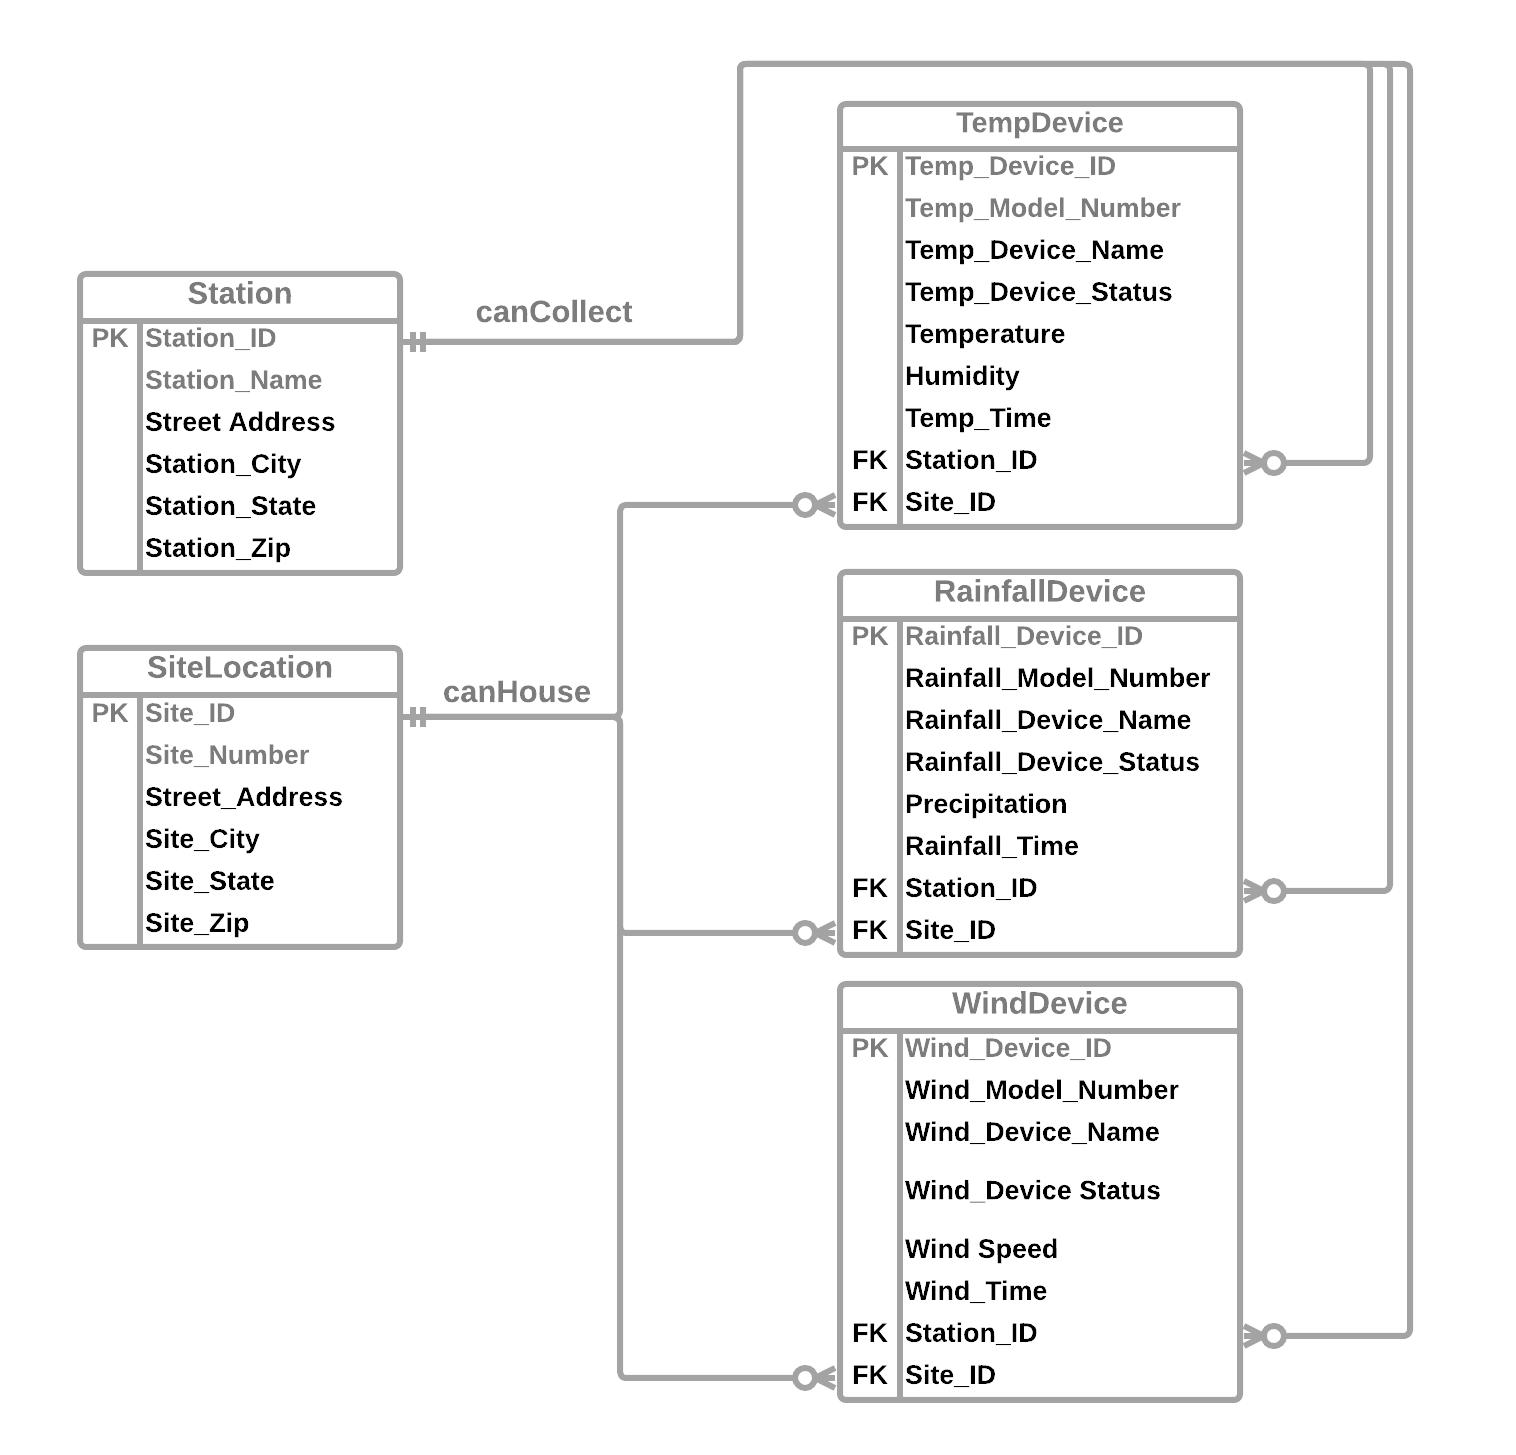

In [ ]:
from IPython.display import Image
Image(filename=r'DM_Project-Weather.png')

### DDL

In [ ]:
/*
Weather DDL
*/

--DROP Sequence/Table Section

/*
Delete any existing tables created in database from before. There is a specific order that each table is deleted due to tables 
that are linked through primary and foreign keys which is based on the relationship between each table.
Deleting the sequences in order to reset any sequences that were used previously.
Harris Azerf (hpa237)
*/
--Deleting the tables
--Harris Azerf (hpa237)
DROP TABLE TempDevice;
DROP TABLE RainfallDevice;
DROP TABLE WindDevice;
DROP TABLE SiteLocation;
DROP TABLE Station;

--Deleting the Sequences
--Harris Azerf (hpa237)

DROP SEQUENCE temp_device_id_seq;
DROP SEQUENCE rainfall_device_id_seq;
DROP SEQUENCE wind_device_id_seq;
DROP SEQUENCE site_id_seq;
DROP SEQUENCE station_id_seq;

--CREATE Sequence/Table Section
/*
Creating the new sequences for each id. The sequences are created first to make it easier to use in the constraints for 
each field
After the sequences are created, the tables are created based on the ERD. Each table is created in a certain order based on
the relationships between each table. As the tables are being created, each field has the data type and any other constraints
added to it. The primary and foreign keys are also defined during this process. Any extra constraints based on the
instructions are added to table after creating the fields.
Harris Azerf (hpa237)
*/

--Creating the new sequences
--Harris Azerf (hpa237)

CREATE SEQUENCE temp_device_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE rainfall_device_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE wind_device_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE site_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE station_id_seq
    START WITH 1000000 INCREMENT BY 1;

--Creating each new table with the correct data types and constraints
--Harris Azerf (hpa237)

--Adding a cc_flag_letter_check constraint to make sure that only Y or N is entered as a value in CC_Flag
--Harris Azerf (hpa237)

CREATE TABLE SiteLocation
(
    Site_ID                 NUMBER          DEFAULT site_id_seq.NEXTVAL         PRIMARY KEY,
    Site_Number             VARCHAR(50)                                         NOT NULL,
    Street_Address          VARCHAR(50)                                         NOT NULL,
    Site_City               VARCHAR(50)                                         NOT NULL,
    Site_State              CHAR(2)                                             NOT NULL,
    Site_Zip                CHAR(5)                                             NOT NULL
);

CREATE TABLE Station
(
    Station_ID              NUMBER          DEFAULT station_id_seq.NEXTVAL      PRIMARY KEY,
    Station_Name          VARCHAR(50)                                         NOT NULL,
    Street_Address          VARCHAR(50)                                         NOT NULL,
    Station_City            VARCHAR(50)                                         NOT NULL,
    Station_State           CHAR(2)                                             NOT NULL,
    Station_Zip             CHAR(5)                                             NOT NULL
);

CREATE TABLE TempDevice
(
    TempDevice_ID           NUMBER          DEFAULT temp_device_id_seq.NEXTVAL  PRIMARY KEY,
    Temp_Model_Number       VARCHAR(50)                                         NOT NULL,
    Temp_Device_Name        VARCHAR(50)                                         NOT NULL,
    Temp_Device_Status      CHAR(1)         DEFAULT 'N',
    Temperature             FLOAT                                               ,
    Humidity                FLOAT                                               ,
    Temp_Time               TIMESTAMP                                           NOT NULL,
    Station_ID              NUMBER                                              NOT NULL,
    Site_ID                 NUMBER                                              NOT NULL,
    CONSTRAINT TempDevice_fk_Station FOREIGN KEY (station_id) REFERENCES Station (station_id),
    CONSTRAINT TempDevice_fk_SiteLocation FOREIGN KEY (site_id) REFERENCES SiteLocation (site_id),
    CONSTRAINT Temp_Device_Status_check CHECK (Temp_Device_Status IN ('Y', 'N'))
);

CREATE TABLE RainfallDevice
(
    Rainfall_Device_ID      NUMBER          DEFAULT rainfall_device_id_seq.NEXTVAL  PRIMARY KEY,
    Rainfall_Model_Number   VARCHAR(50)                                             NOT NULL,
    Rainfall_Device_Name    VARCHAR(50)                                             NOT NULL,
    Rainfall_Device_Status  CHAR(1)         DEFAULT 'N',
    Precipitation           FLOAT                                                   ,
    Rainfall_Time           TIMESTAMP                                               NOT NULL,
    Station_ID              NUMBER                                                  NOT NULL,
    Site_ID                 NUMBER                                                  NOT NULL,
    CONSTRAINT RainfallDevice_fk_Station FOREIGN KEY (station_id) REFERENCES Station (station_id),
    CONSTRAINT RainfallDevice_fk_SiteLocation FOREIGN KEY (site_id) REFERENCES SiteLocation (site_id),
    CONSTRAINT Rainfall_Device_Status_check CHECK (Rainfall_Device_Status IN ('Y', 'N'))
);

CREATE TABLE WindDevice
(
    Wind_Device_ID      NUMBER          DEFAULT wind_device_id_seq.NEXTVAL      PRIMARY KEY,
    Wind_Model_Number   VARCHAR(50)                                             NOT NULL,
    Wind_Device_Name    VARCHAR(50)                                             NOT NULL,
    Wind_Device_Status  CHAR(1)         DEFAULT 'N',
    Wind_Speed          FLOAT                                                   ,
    Wind_Time           TIMESTAMP                                               NOT NULL,
    Station_ID          NUMBER                                                  NOT NULL,
    Site_ID             NUMBER                                                  NOT NULL,
    CONSTRAINT WindDevice_fk_Station FOREIGN KEY (station_id) REFERENCES Station (station_id),
    CONSTRAINT WindDevice_fk_SiteLocation FOREIGN KEY (site_id) REFERENCES SiteLocation (site_id),
    CONSTRAINT Wind_Device_Status_check CHECK (Wind_Device_Status IN ('Y', 'N'))
);

## Traffic

### Model

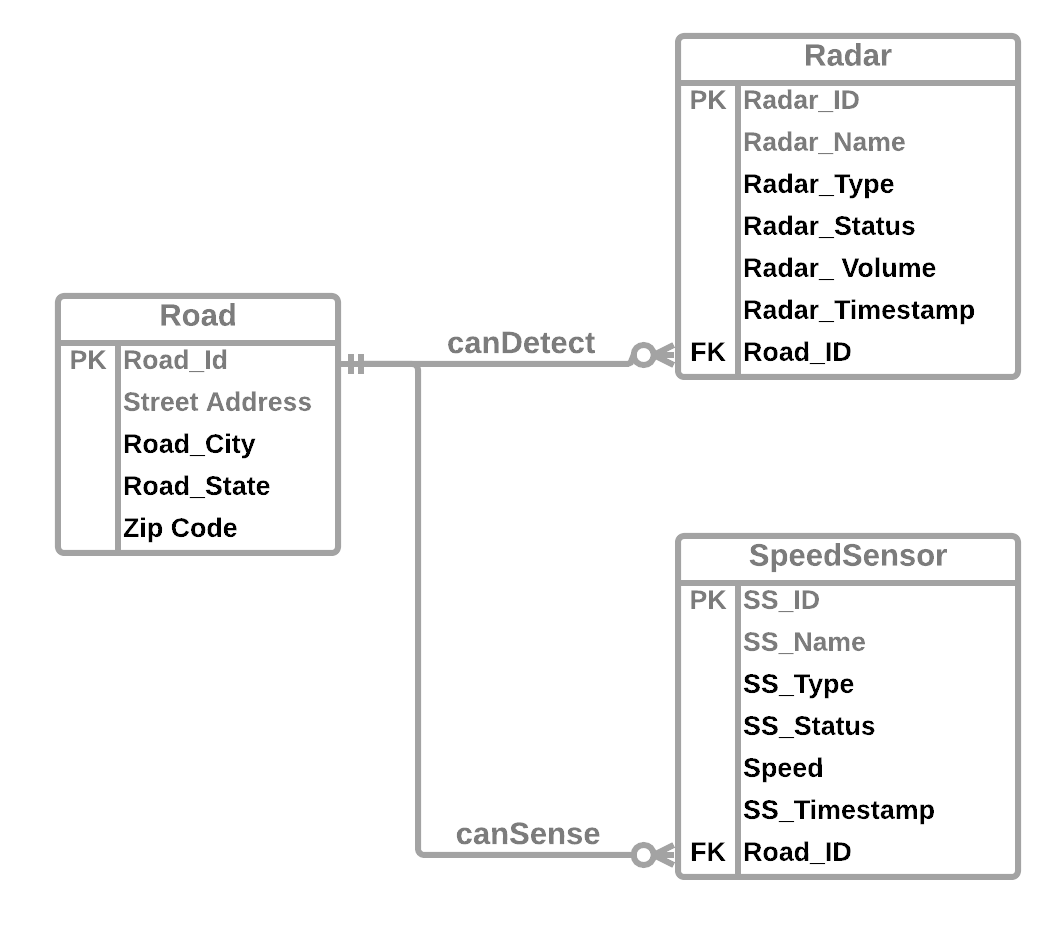

In [ ]:
from IPython.display import Image
Image(filename=r'DM_Project-Road.png')

### DDL

In [ ]:
/* Street Database */

--Dropping Tables
DROP TABLE Radar;
DROP TABLE SpeedSensor;
DROP TABLE Road;

--Dropping Sequences
DROP SEQUENCE road_id_seq;
DROP SEQUENCE radar_id_seq;
DROP SEQUENCE ss_id_seq;


--Creating Sequences
CREATE SEQUENCE road_id_seq start with 1 INCREMENT BY 1;
CREATE SEQUENCE radar_id_seq start with 1 INCREMENT BY 1;
CREATE SEQUENCE ss_id_seq start with 1 INCREMENT BY 1;

--Create Road Tables
CREATE TABLE Road (
    Road_ID NUMBER DEFAULT road_id_seq.NEXTVAL,
    StreetAddress VARCHAR(20) NOT NULL,
    Road_City VARCHAR(10) NOT NULL,
    Road_State CHAR(2) NOT NULL,
    ZipCode CHAR(5) NOT NULL,
    CONSTRAINT road_pk PRIMARY KEY(Road_ID)
);


--Create Radar Tables
CREATE TABLE Radar (
    Radar_ID NUMBER DEFAULT radar_id_seq.NEXTVAL,
    Radar_Name VARCHAR(50) NOT NULL,
    Radar_Type VARCHAR(10) NOT NULL,
    Radar_Status CHAR(1) DEFAULT 'N' NOT NULL,
    Radar_Volume FLOAT,
    Rader_Timestamp TIMESTAMP NOT NULL,
    Road_ID NUMBER NOT NULL,
    CONSTRAINT radar_pk PRIMARY KEY(Radar_ID),
    CONSTRAINT radar_status_flag CHECK(Radar_Status IN ('Y', 'N')),
    FOREIGN KEY (Road_ID) REFERENCES Road(Road_ID)
);

--Create SpeedSensor Tables
CREATE TABLE SpeedSensor (
    SS_ID NUMBER DEFAULT ss_id_seq.NEXTVAL,
    SS_Name VARCHAR(50) NOT NULL,
    SS_Type VARCHAR(10) NOT NULL,
    SS_Status CHAR(1) DEFAULT 'N' NOT NULL,
    Speed FLOAT,
    SS_Timestamp TIMESTAMP NOT NULL,
    Road_ID NUMBER NOT NULL,
    CONSTRAINT speedsensor_pk PRIMARY KEY(SS_ID),
    CONSTRAINT ssr_status_flag CHECK(SS_Status IN ('Y', 'N')),
    FOREIGN KEY (Road_ID) REFERENCES Road(Road_ID)
);

## Transportation (Bus)

### Model

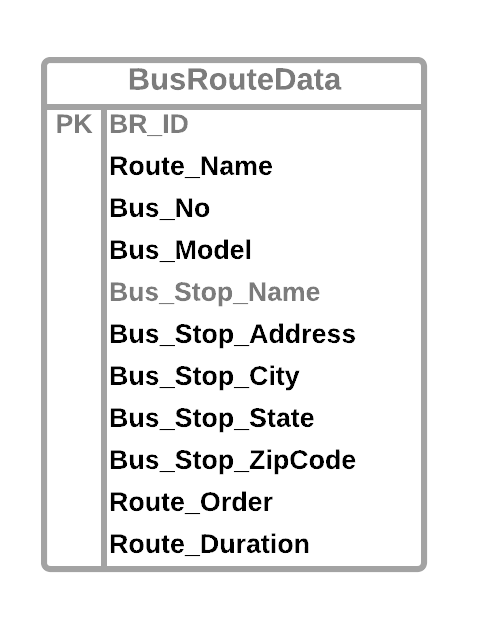

In [ ]:
from IPython.display import Image
Image(filename=r'DM_Project-Bus_Route.png')

### DDL

In [ ]:
--Dropping Tables
DROP TABLE BusRoute;

--Dropping Sequences
DROP SEQUENCE br_id_seq;

--Creating Sequences
CREATE SEQUENCE br_id_seq start with 1 INCREMENT BY 1;

CREATE TABLE BusRoute(
    BR_ID                   NUMBER          DEFAULT br_id_seq.NEXTVAL            PRIMARY KEY,
    Route_Name              VARCHAR(10)                                             NOT NULL,
    Bus_No                  VARCHAR(20)                                             NOT NULL,
    Bus_Model               VARCHAR(20)                                             NOT NULL,
    Bus_Stop_Name           VARCHAR(50)                                             NOT NULL,
    BusStop_address         VARCHAR(20)                                             NOT NULL,
    BusStop_City            VARCHAR(10)                                             NOT NULL,
    BusStop_state           CHAR(2)                                                 NOT NULL,
    BusStop_ZipCode         CHAR(5)                                                 NOT NULL,
    Route_order             NUMBER                                                  NOT NULL,
    route_duration          NUMBER                                                  NOT NULL
);

## Seeding Data

In [ ]:

--INSERTING Data into Road Database
INSERT INTO Road
    VALUES (DEFAULT, 'MLK Blvd', 'Austin', 'TX', '78701');
INSERT INTO Road
    VALUES (DEFAULT, 'East 11th St', 'Austin', 'TX', '78709');
INSERT INTO Road
    VALUES (DEFAULT, 'Guadalupe St', 'Austin', 'TX', '78705');
COMMIT;

INSERT INTO Radar
    VALUES (DEFAULT, 'MLK Radar 1', 'Radar 3000', 'Y', 20, '23-Dec-19 05:00:00 PM', 1);
INSERT INTO Radar
    VALUES (DEFAULT, 'MLK Radar 1', 'Radar 3000', 'Y', 15, '23-Dec-19 05:15:00 PM', 1);
INSERT INTO Radar
    VALUES (DEFAULT, 'MLK Radar 1', 'Radar 3000', 'N', NULL , '23-Dec-19 05:30:00 PM', 1);
INSERT INTO Radar
    VALUES (DEFAULT, 'MLK Radar 1', 'Radar 5000', 'Y', 5, '30-Mar-20 10:00:00 AM', 1);
INSERT INTO Radar
    VALUES (DEFAULT, 'MLK Radar 1', 'Radar 5000', 'Y', 10, '30-Mar-20 10:30:00 AM', 1);
INSERT INTO Radar
    VALUES (DEFAULT, 'MLK Radar 1', 'Radar 5000', 'Y', 25, '30-Mar-20 11:00:00 AM', 1);
INSERT INTO Radar
    VALUES (DEFAULT, 'Guadalupe St Radar', 'Radar 5000', 'Y', 15, '30-Mar-20 10:00:00 AM', 3);
INSERT INTO Radar
    VALUES (DEFAULT, 'Guadalupe St Radar', 'Radar 5000', 'Y', 23, '30-Mar-20 10:30:00 AM', 3);
INSERT INTO Radar
    VALUES (DEFAULT, 'Guadalupe St Radar', 'Radar 5000', 'Y', 25, '30-Mar-20 11:00:00 AM', 3);
COMMIT;

INSERT INTO SpeedSensor
    VALUES (DEFAULT, 'MLK Speed', 'Sensor XY', 'Y', 10, '30-Mar-20 10:00:00 AM', 1);
INSERT INTO SpeedSensor
    VALUES (DEFAULT, 'MLK Speed', 'Sensor XY', 'Y', 10, '30-Mar-20 10:30:00 AM', 1);
INSERT INTO SpeedSensor
    VALUES (DEFAULT, 'MLK Speed', 'Sensor XY', 'Y', 25, '30-Mar-20 11:00:00 AM', 1);
INSERT INTO SpeedSensor
    VALUES (DEFAULT, 'Guadalupe Speed', 'Sensor XY', 'Y', 25, '30-Mar-20 10:00:00 AM', 3);
INSERT INTO SpeedSensor
    VALUES (DEFAULT, 'Guadalupe Speed', 'Sensor XY', 'Y', 25, '30-Mar-20 10:30:00 AM', 3);
INSERT INTO SpeedSensor
    VALUES (DEFAULT, 'Guadalupe Speed', 'Sensor XY', 'Y', 25, '30-Mar-20 11:00:00 AM', 3);
COMMIT;   
    
-- INSERTING Data into Weather Database
INSERT INTO SiteLocation
    VALUES (DEFAULT, 'Site 52','123 MLK Blvd', 'Austin', 'TX', '78701');
INSERT INTO SiteLocation
    VALUES (DEFAULT, 'Site 23','321 East 12th St', 'Austin', 'TX', '78709');
INSERT INTO SiteLocation
    VALUES (DEFAULT, 'Site 51', ' 456 Guadalupe St', 'Austin', 'TX', '78705');
    
INSERT INTO Station
    VALUES (DEFAULT, 'North Station 01','2090 Airport Road', 'Austin', 'TX', '78701');

INSERT INTO TempDevice
    VALUES (DEFAULT, 'TempX307', 'MLK Temp', 'Y', 77.1, 20, '30-Mar-20 10:00:00 AM', 1000000, 1000000);
INSERT INTO TempDevice
    VALUES (DEFAULT, 'TempX307', 'MLK Temp', 'Y', 77.2, 20, '30-Mar-20 11:00:00 AM', 1000000, 1000000);
INSERT INTO TempDevice
    VALUES (DEFAULT, 'TempX307', 'E12thSt Temp', 'Y', 77.3, 20, '30-Mar-20 10:00:00 AM', 1000000, 1000001);
INSERT INTO TempDevice
    VALUES (DEFAULT, 'TempX307', 'E12thSt Temp', 'Y', 77.2, 20, '30-Mar-20 11:00:00 AM', 1000000, 1000001);
COMMIT;
INSERT INTO RainfallDevice
    VALUES (DEFAULT, 'GaugeY7', 'MLK Rain', 'Y', 0.17, '30-Mar-20 10:00:00 AM', 1000000, 1000000);
INSERT INTO RainfallDevice
    VALUES (DEFAULT, 'GaugeY7', 'MLK Rain', 'Y', 0.17, '30-Mar-20 11:00:00 AM', 1000000, 1000000);
INSERT INTO RainfallDevice
    VALUES (DEFAULT, 'GaugeY7', 'E12thSt Rain', 'Y', 0.15, '30-Mar-20 10:00:00 AM', 1000000, 1000001);
INSERT INTO RainfallDevice
    VALUES (DEFAULT, 'GaugeY7', 'E12thSt Rain', 'Y', 0.15, '30-Mar-20 11:00:00 AM', 1000000, 1000001);
COMMIT;
INSERT INTO WindDevice
    VALUES (DEFAULT, 'WindSpeed100', 'MLK Wind', 'Y', 9, '30-Mar-20 10:00:00 AM', 1000000, 1000000);
INSERT INTO WindDevice
    VALUES (DEFAULT, 'WindSpeed100', 'MLK Wind', 'Y', 9, '30-Mar-20 11:00:00 AM', 1000000, 1000000);
INSERT INTO WindDevice
    VALUES (DEFAULT, 'WindSpeed100', 'E12thSt Wind', 'Y', 4, '30-Mar-20 10:00:00 AM', 1000000, 1000001);
INSERT INTO WindDevice
    VALUES (DEFAULT, 'WindSpeed100', 'E12thSt Wind', 'Y', 4, '30-Mar-20 11:00:00 AM', 1000000, 1000001);
COMMIT;    

--INSERTING BUS ROUTE
COMMIT;
INSERT INTO BusRoute
    VALUES (DEFAULT, 'Route A', '33', 'Bus 300', 'M L King/Trinity (Midblock)', 'MLK Blvd', 'Austin', 'TX', '78701', 1, 30);
INSERT INTO BusRoute
    VALUES (DEFAULT, 'Route A', '33', 'Bus 300', '12th/IH-35', 'East 12th St', 'Austin', 'TX', '78702', 2, 30);
INSERT INTO BusRoute
    VALUES (DEFAULT, 'Route B', '33A', 'Bus 300', 'Guadalupe/W. 21st Street', 'Guadalupe St', 'Austin', 'TX', '78702', 1, 30);
INSERT INTO BusRoute
    VALUES (DEFAULT, 'Route B', '33A', 'Bus 300', 'M L King/Trinity (Midblock)', 'MLK Blvd', 'Austin', 'TX', '78701', 1, 30);
COMMIT;

# Datawarehouse

## Model

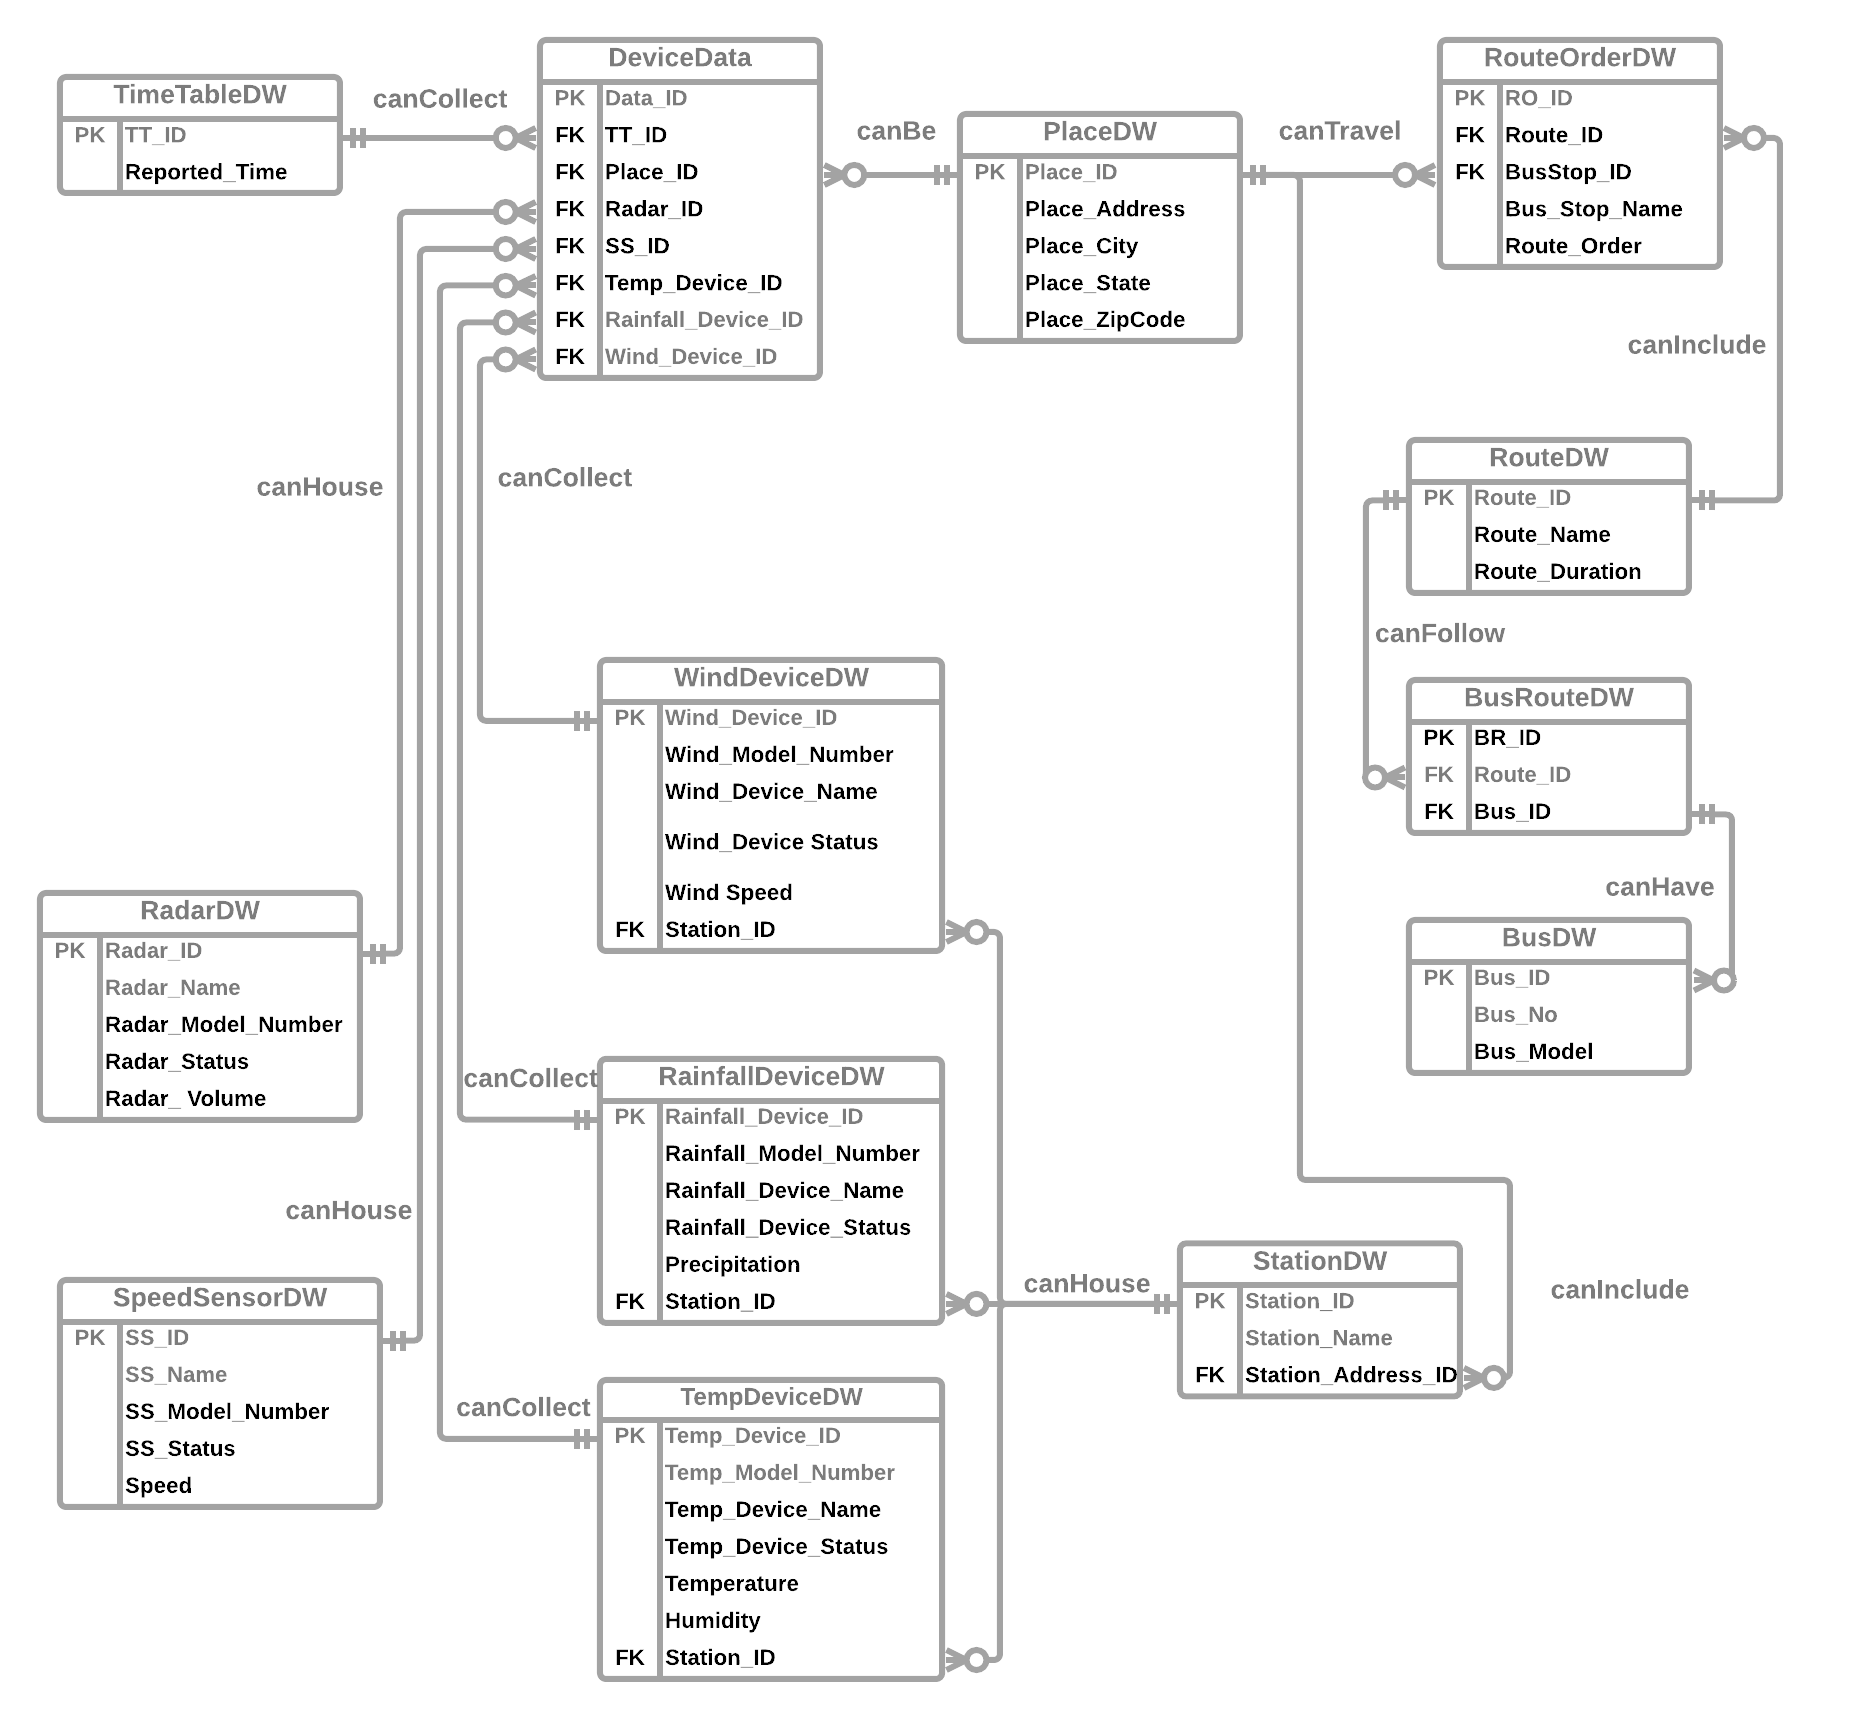

In [ ]:
from IPython.display import Image
Image(filename=r'DM-Final_Project-Data_Warehouse.png')

## DDL

In [ ]:
DROP TABLE ROUTEORDERDW;
DROP TABLE BusRouteDW;
DROP TABLE BusDW;
DROP TABLE RouteDW;
DROP TABLE DeviceData;
DROP TABLE TimeTableDW;
DROP TABLE TempDeviceDW;
DROP TABLE RainfallDeviceDW;
DROP TABLE WindDeviceDW;
DROP TABLE StationDW;
DROP TABLE PlaceDW;
DROP TABLE RadarDW;
DROP TABLE SpeedSensorDW;



DROP SEQUENCE DeviceData_id_seq;
DROP SEQUENCE place_id_seq;
DROP SEQUENCE TimeTable_id_seq;
DROP SEQUENCE busdw_id_seq;
DROP SEQUENCE brdw_id_seq;
DROP SEQUENCE routedw_id_seq;
DROP SEQUENCE rodw_id_seq;


CREATE SEQUENCE DeviceData_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE place_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE TimeTable_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE busdw_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE routedw_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE brdw_id_seq
    START WITH 1000000 INCREMENT BY 1;
CREATE SEQUENCE rodw_id_seq
    START WITH 1000000 INCREMENT BY 1;
    
    


CREATE TABLE PlaceDW(
    Place_ID            NUMBER        DEFAULT place_id_seq.NEXTVAL                  PRIMARY KEY,
    Place_address       VARCHAR(10)                                                 NOT NULL,
    Place_City          VARCHAR(10)                                                 NOT NULL,
    Place_state         CHAR(2)                                                     NOT NULL,
    Place_ZipCode       CHAR(5)                                                     NOT NULL
);

CREATE TABLE TimeTableDW
(
    TT_ID                 NUMBER          DEFAULT TimeTable_id_seq.NEXTVAL      PRIMARY KEY,
    Reported_Time         TIMESTAMP                                             NOT NULL
);

--Create Radar Tables
CREATE TABLE RadarDW (
    Radar_ID            NUMBER,                       
    Radar_Name          VARCHAR(50)                                     NOT NULL,
    Radar_Model_Number  VARCHAR(10)                                     NOT NULL,
    Radar_Status        CHAR(1)                                         NOT NULL,
    Radar_Volume        FLOAT,
    CONSTRAINT radardw_pk PRIMARY KEY(Radar_ID),
    CONSTRAINT radardw_status_flag CHECK(Radar_Status IN ('Y', 'N'))
);

--Create SpeedSensor Tables
CREATE TABLE SpeedSensorDW (
    SS_ID           NUMBER,
    SS_Name         VARCHAR(50)                                         NOT NULL,
    SS_Model_Number VARCHAR(10)                                         NOT NULL,
    SS_Status       CHAR(1)                                             NOT NULL,
    Speed           FLOAT,
    CONSTRAINT ssdw_pk PRIMARY KEY(SS_ID),
    CONSTRAINT ssdw_status_flag CHECK(SS_Status IN ('Y', 'N'))
);

CREATE TABLE StationDW
(
    Station_ID              NUMBER                                              PRIMARY KEY,
    Station_Name          VARCHAR(50)                                         NOT NULL,
    Station_address_ID      NUMBER,
    CONSTRAINT DSdw_fk_place_id FOREIGN KEY (station_address_id) REFERENCES PlaceDW(Place_ID)
);

CREATE TABLE TempDeviceDW
(
    Temp_Device_ID           NUMBER,
    Temp_Model_Number       VARCHAR(50)                                         NOT NULL,
    Temp_Device_Name        VARCHAR(50)                                         NOT NULL,
    Temp_Device_Status      CHAR(1),
    Temperature             FLOAT                                               ,
    Humidity                FLOAT                                               ,
    Station_ID              NUMBER                                              NOT NULL,
    CONSTRAINT tempdw_pk PRIMARY KEY(Temp_Device_ID),
    CONSTRAINT TDdw_fk_station FOREIGN KEY (station_id) REFERENCES StationDW (station_id),
    CONSTRAINT Temp_Devicedw_Status_check CHECK (Temp_Device_Status IN ('Y', 'N'))
);

CREATE TABLE RainfallDeviceDW
(
    Rainfall_Device_ID      NUMBER                                                  PRIMARY KEY,
    Rainfall_Model_Number   VARCHAR(50)                                             NOT NULL,
    Rainfall_Device_Name    VARCHAR(50)                                             NOT NULL,
    Rainfall_Device_Status  CHAR(1),        
    Precipitation           FLOAT                                                   ,
    Station_ID              NUMBER                                                  NOT NULL,
    CONSTRAINT RDdw_fk_station FOREIGN KEY (station_id) REFERENCES StationDW (station_id),
    CONSTRAINT Rainfall_Devicedw_Status_check CHECK (Rainfall_Device_Status IN ('Y', 'N'))
);

CREATE TABLE WindDeviceDW
(
    Wind_Device_ID      NUMBER                                                  PRIMARY KEY,
    Wind_Model_Number   VARCHAR(50)                                             NOT NULL,
    Wind_Device_Name    VARCHAR(50)                                             NOT NULL,
    Wind_Device_Status  CHAR(1),
    Wind_Speed          FLOAT                                                   ,
    Station_ID          NUMBER                                                  NOT NULL,
    CONSTRAINT WDdw_fk_station FOREIGN KEY (station_id) REFERENCES StationDW (station_id),
    CONSTRAINT Wind_Devicedw_Status_check CHECK (Wind_Device_Status IN ('Y', 'N'))
);


CREATE TABLE DeviceData(
    Data_ID         NUMBER              DEFAULT DeviceData_id_seq.NEXTVAL              PRIMARY KEY,
    TT_ID           NUMBER              REFERENCES TimeTableDW (TT_ID),
    Place_ID        NUMBER              REFERENCES PlaceDW (Place_ID),
    Radar_ID        NUMBER              REFERENCES RadarDW (Radar_ID),
    SS_ID           NUMBER              REFERENCES SpeedSensorDW (SS_ID),
    Temp_Device_ID   NUMBER              REFERENCES TempDeviceDW (Temp_Device_ID),
    Rainfall_Device_ID  NUMBER          REFERENCES RainfallDeviceDW (Rainfall_Device_ID),
    Wind_Device_ID      NUMBER           REFERENCES WindDeviceDW (Wind_Device_ID)
    
);

CREATE TABLE BusDW(
    BUS_ID      NUMBER      DEFAULT busdw_id_seq.NEXTVAL  Primary Key,
    Bus_No      VARCHAR(10)                             NOT NULL,
    Bus_Model   VARCHAR(10)                             NOT NULL
);


--Create Route Table
CREATE TABLE RouteDW(
    Route_ID NUMBER DEFAULT routedw_id_seq.NEXTVAL,
    Route_Name VARCHAR(10) NOT NULL,
    Route_Duration Number NOT NULL,
    CONSTRAINT routedw_pk PRIMARY KEY(Route_ID)
);

--Create BusRoute Table
CREATE TABLE BusRouteDW(
    BR_ID NUMBER DEFAULT brdw_id_seq.NEXTVAL,
    Route_ID NUMBER NOT NULL,
    Bus_ID NUMBER NOT NULL,
    CONSTRAINT busroutedw_pk PRIMARY KEY(BR_ID),
    FOREIGN KEY (Route_ID) REFERENCES RouteDW(Route_ID),
    FOREIGN KEY (Bus_ID) REFERENCES BusDW(Bus_ID)
);

--Create RouteOrder Table
CREATE TABLE RouteOrderDW(
    RO_ID NUMBER DEFAULT rodw_id_seq.NEXTVAL Primary Key,
    Route_ID NUMBER NOT NULL,
    BusStop_ID NUMBER NOT NULL,
    Bus_Stop_Name VARCHAR(50) NOT NULL,
    Route_Order NUMBER NOT NULL,
    FOREIGN KEY (Route_ID) REFERENCES RouteDW(Route_ID),
    FOREIGN KEY (BusStop_ID) REFERENCES PlaceDW(Place_ID)
);





# ETL

## Setup

In [ ]:
!pip install cx_Oracle

In [ ]:
! ls -l oracle-instantclient*-basiclite-*.rpm || wget https://yum.oracle.com/repo/OracleLinux/OL7/oracle/instantclient/x86_64/getPackage/oracle-instantclient19.3-basiclite-19.3.0.0.0-1.x86_64.rpm
! sudo apt-get install alien libaio1
! sudo alien -i oracle-instantclient19.3-basiclite-19.3.0.0.0-1.x86_64.rpm

In [ ]:
import sqlalchemy as sql
import pandas as pd
import numpy as np
import cx_Oracle

Overall framework:

1. Extract in from OLTP databases into python objects
    * Public transportation
    * Traffic
    * Weather
2. Tranform Data to match requirements of data warehouse
3. Load transformed data into data warehouse




#### Connection to Database(s)

In [ ]:
conn = cx_Oracle.connect('user', 'pw', cx_Oracle.makedsn('msb-msitm.austin.utexas.edu', 1521, 'ORCL'))
cursor = conn.cursor()

##Traffic OLTP
Three tables: Road, Radar, SpeedSensor

In [ ]:
class Road:
  def __init__(self, road_id, street_address, road_city, road_state, zip_code):
    self.road_id = road_id
    self.street_address = street_address
    self.road_city = road_city
    self.road_state = road_state
    self.zip_code = zip_code

In [ ]:
class Radar:
	def __init__(self, radar_id, radar_name, radar_type, radar_status, radar_volume, radar_timestamp, road_id):
		self.radar_id = radar_id
		self.radar_name = radar_name
		self.radar_type = radar_type
		self.radar_status = radar_status
		self.radar_volume = radar_volume
		self.radar_timestamp = radar_timestamp
		self.road_id = road_id

In [ ]:
class SpeedSensor:
  def __init__(self, ss_id, ss_name, ss_type, ss_status, speed, ss_timestamp, road_id):
    self.ss_id = ss_id
    self.ss_name = ss_name
    self.ss_type = ss_type
    self.ss_status = ss_status
    self.speed = speed
    self.ss_timestamp = ss_timestamp
    self.road_id = road_id

##Traffic Data warehouse

In [ ]:
class TimeTableDW:
  def __init__(self,  reported_time):
    #self.tt_id = tt_id #self generated ID in DW
    self.reported_time = reported_time

In [ ]:
class DeviceData:
  def __init__(self, tt_id, place_id, radar_id, ss_id, temp_device_id, rainfall_device_id, wind_device_id):
    #self.data_id = data_id
    self.tt_id = tt_id
    self.place_id = place_id
    self.radar_id = radar_id
    self.ss_id = ss_id
    self.temp_device_id = temp_device_id
    self.rainfall_device_id = rainfall_device_id
    self.wind_device_id = wind_device_id

In [ ]:
class PlaceDW:
  def __init__(self, place_address, place_city, place_state, place_zipcode):
    #self.place_id = place_id
    self.place_address = place_address
    self.place_city = place_city
    self.place_state = place_state
    self.place_zipcode = place_zipcode

In [ ]:
class RadarDW:
  def __init__(self, radar_id, radar_name, radar_model_number, radar_status, radar_volume):
    self.radar_id = radar_id 
    self.radar_name = radar_name
    self.radar_model_number = radar_model_number
    self.radar_status = radar_status
    self.radar_volume = radar_volume


In [ ]:
class SpeedSensorDW:
  def __init__(self, ss_id, ss_name, ss_model_number, ss_status, speed):
    self.ss_id = ss_id
    self.ss_name = ss_name
    self.ss_model_number = ss_model_number
    self.ss_status = ss_status
    self.speed = speed

##Traffic ETL 

In [ ]:
radar_query = 'SELECT * FROM Radar'
radar_query_list = [radar for radar in cursor.execute(radar_query)]
radar_obj_list = []

for row_radar in range(len(radar_query_list)):
  result = radar_query_list[row_radar]
  radar_oltp = Radar(result[0], result[1], result[2], result[3], result[4], result[5], result[6])
  radar_obj_list.append(radar_oltp)

#print(radar_obj_list[1].radar_id) #testing

In [ ]:
speedsensor_query = 'SELECT * FROM SpeedSensor'
speedsensor_query_list = [speed_sensor for speed_sensor in cursor.execute(speedsensor_query)]
speedsensor_obj_list = []

for row_speedsensor in range(len(speedsensor_query_list)):
  result = speedsensor_query_list[row_speedsensor]
  speedsensor_oltp = SpeedSensor(result[0], result[1], result[2], result[3], result[4], result[5], result[6])
  speedsensor_obj_list.append(speedsensor_oltp)

#print(speedsensor_obj_list[1].ss_name)

##Traffic ETL- Function Definitions (Radar)

In [ ]:
def traffic_transform(obj, cursor):

    ## get Radar attributes
    radar_id = getattr(obj, 'radar_id')
    radar_name = getattr(obj, 'radar_name')
    radar_model_num = getattr(obj, 'radar_type')
    radar_status = getattr(obj, 'radar_status')
    radar_volume = getattr(obj, 'radar_volume')
    radar_timestamp = getattr(obj, 'radar_timestamp')
    road_id = getattr(obj, 'road_id')

    ##sql where we get road information
    sql_road_oltp = "SELECT * FROM Road WHERE Road_ID = {}".format(road_id)


    try:

        cursor.execute(sql_road_oltp)
        result = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Road information:')
        print(error)

    obj_road = Road(result[0], result[1], result[2], result[3], result[4])
    # get Road attributes
    street_address = getattr(obj_road, 'street_address')
    road_city = getattr(obj_road, 'road_city')
    road_state = getattr(obj_road, 'road_state')
    zip_code = getattr(obj_road, "zip_code")

    radar_dw = RadarDW(radar_id, radar_name, radar_model_num, radar_status, radar_volume)
    tt_dw = TimeTableDW(radar_timestamp) #we can have that id but not use it
    place_dw = PlaceDW(street_address, road_city, road_state, zip_code)

    return radar_dw, tt_dw, place_dw

    

In [ ]:
def traffic_load(radar, tt, place, cursor):
    #sql for radar
    sql_radar = ('insert into RadarDW(Radar_ID, Radar_Name, Radar_Model_Number, Radar_Status, Radar_Volume)'
        'values(:Radar_ID,:Radar_Name,:Radar_Model_Number,:Radar_Model_Number,:Radar_Volume)')

    sql_place = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_time = ('insert into TimeTableDW(Reported_Time)'
    'values(:Reported_Time)')



    ############# Loading radar, place and timetable######################


    try:
      # execute the insert statement
      cursor.execute(sql_radar, [radar.radar_id, radar.radar_name, radar.radar_model_number,
                                radar.radar_status, radar.radar_volume])
      print("RadarDW row inserted")


     except cx_Oracle.Error as error:
        print('Error occurred when inserting radarDW row:')
        print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_place, [place.place_address, place.place.place_address,
                                   place.place_state, place.place_zip_code])
        print("PlaceDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting placeDW row:')
            print(error)


    try:
        # execute the insert statement

        cursor.execute(sql_time, [tt.reported_time])
        print("TimeDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting timeDW row:')
            print(error)


    ############## Getting DeviceData info #####################

    place_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place.place_address} \
    and Place_City = {place.place_address} \
    and Place_State = {place.place_state} and Place_ZipCode = {place.place_zip_code}"

    tt_id_query = f"select tt_id from TimeTableDW where Reported_Time = {tt.reported_time}"

    try:

        cursor.execute(place_id_query)
        place_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID: {place_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id:')
        print(error)

    try:

        cursor.execute(tt_id_query)
        tt_id = cursor.fetchone()[0]
        print(f"Fetched TimeTable ID: {tt_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching timetable id:')
        print(error)

    ################### Inserting into DeviceData ###########################

    sql_devicedata = ('insert into DeviceData(TT_ID, Place_ID, Radar_ID)'
    'values(:TT_ID, :Place_ID, :Radar_ID')

    try:

        cursor.execute(sql_devicedata, [tt_id, place_id, radar.radar_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting DeviceData:')
        print(error)

    return None

In [ ]:
########### The block below calls the above functions #################
for x in radar_obj_list:
    radar_dw_, tt_dw_, place_dw_ = traffic_transform(x, cursor)
    traffic_load(radar_dw_, tt_dw_, place_dw_, cursor)
    conn.commit()

## Traffic ETL- Function Definition (Speed)

In [ ]:
def speed_transform(obj, cursor):

    ## get Radar attributes
    ss_id = getattr(obj, 'ss_id')
    ss_name = getattr(obj, 'ss_name')
    ss_model_num = getattr(obj, 'ss_type')
    ss_status = getattr(obj, 'ss_status')
    ss_speed = getattr(obj, 'speed')
    ss_timestamp = getattr(obj, 'ss_timestamp')
    road_id = getattr(obj, 'road_id')

    ##sql where we get road information
    sql_road_oltp = "SELECT * FROM Road WHERE Road_ID = {}".format(road_id)


    try:

        cursor.execute(sql_road_oltp)
        result = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Road information:')
        print(error)

    obj_road = Road(result[0], result[1], result[2], result[3], result[4])
    # get Road attributes
    street_address = getattr(obj_road, 'street_address')
    road_city = getattr(obj_road, 'road_city')
    road_state = getattr(obj_road, 'road_state')
    zip_code = getattr(obj_road, "zip_code")


    speed_dw = SpeedSensorDW(ss_id, ss_name, ss_model_num, ss_status, ss_speed)
    tt_dw = TimeTableDW(ss_timestamp) #we can have that id but not use it
    place_dw = PlaceDW(street_address, road_city, road_state, zip_code)

    return speed_dw, tt_dw, place_dw

In [ ]:
def speed_load(speed, tt, place, cursor):
    #sql for speed
    sql_speed = ('insert into SpeedSensorDW(SS_ID, SS_Name, SS_Model_Number, SS_Status, Speed)'
        'values(:SS_ID,:SS_Name,:SS_Model_Number,:SS_Model_Number,:SS_Volume)')

    sql_place = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_time = ('insert into TimeTableDW(Reported_Time)'
    'values(:Reported_Time)')



    ############# Loading speed, place and timetable######################


    try:
      # execute the insert statement
      cursor.execute(sql_speed, [speed.ss_id, speed.ss_name, speed.ss_model_number,
                                speed.ss_status, speed.speed])
      print("SpeedSensorDW row inserted")


     except cx_Oracle.Error as error:
        print('Error occurred when inserting SpeedSensorDW row:')
        print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_place, [place.place_address, place.place.place_address,
                                   place.place_state, place.place_zip_code])
        print("PlaceDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting placeDW row:')
            print(error)


    try:
        # execute the insert statement

        cursor.execute(sql_time, [tt.reported_time])
        print("TimeDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting timeDW row:')
            print(error)


    ############## Getting DeviceData info #####################

    place_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place.place_address} \
    and Place_City = {place.place_address} \
    and Place_State = {place.place_state} and Place_ZipCode = {place.place_zip_code}"

    tt_id_query = f"select tt_id from TimeTableDW where Reported_Time = {tt.reported_time}"

    try:

        cursor.execute(place_id_query)
        place_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID: {place_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id:')
        print(error)

    try:

        cursor.execute(tt_id_query)
        tt_id = cursor.fetchone()[0]
        print(f"Fetched TimeTable ID: {tt_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching timetable id:')
        print(error)

    ################### Inserting into DeviceData ###########################

    sql_devicedata = ('insert into DeviceData(TT_ID, Place_ID, SS_ID)'
    'values(:TT_ID, :Place_ID, :SS_ID')

    try:

        cursor.execute(sql_devicedata, [tt_id, place_id, speed.ss_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting DeviceData:')
        print(error)

    return None


In [ ]:
########### The block below calls the above functions #################
for x in speed_obj_list:
    speed_dw_, tt_dw_, place_dw_ = traffic_transform(x, cursor)
    speed_load(speed_dw_, tt_dw_, place_dw_, cursor)
    conn.commit()

##Weather OLTP
Five tables: Station, SiteLocation, TempDevice, RainfallDevice, WindDevice

In [ ]:
class Station:
  def __init__(self, station_id, station_name, street_address, station_city, station_state, station_zip):
    self.station_id = station_id
    self.station_name = station_name
    self.street_address = street_address
    self.station_city = station_city
    self.station_state = station_state
    self.station_zip = station_zip

In [ ]:
class SiteLocation:
	def __init__(self, site_id, site_number, street_address, site_city, site_state, site_zip):
		self.site_id = site_id
		self.site_number = site_number
		self.street_address = street_address
		self.site_city = site_city
		self.site_state = site_state
		self.site_zip = site_zip

In [ ]:
class RainfallDevice:
	def __init__(self, rainfall_device_id, rainfall_model_number, rainfall_device_name, rainfall_device_status, precipitation, rainfall_time, station_id, site_id):
		self.rainfall_device_id = rainfall_device_id
		self.rainfall_model_number = rainfall_model_number
		self.rainfall_device_name = rainfall_device_name
		self.rainfall_device_status = rainfall_device_status
		self.precipitation = precipitation
		self.rainfall_time = rainfall_time
		self.station_id = station_id
		self.site_id = site_id

In [ ]:
class TempDevice:
  def __init__(self, temp_device_id, temp_model_number, temp_device_name, temp_device_status, temperature, humidity, temp_time, station_id, site_id):
   self.temp_device_id = temp_device_id
   self.temp_model_number = temp_model_number
   self.temp_device_name = temp_device_name
   self.temp_device_status = temp_device_status
   self.temperature = temperature
   self.humidity = humidity
   self.temp_time = temp_time
   self.station_id = station_id
   self.site_id = site_id

In [ ]:
class WindDevice:
  def __init__(self, wind_device_id, wind_model_number, wind_device_name, wind_device_status, wind_speed, wind_time, station_id, site_id):
    self.wind_device_id = wind_device_id
    self.wind_model_number = wind_model_number
    self.wind_device_name = wind_device_name
    self.wind_device_status = wind_device_status
    self.wind_speed = wind_speed
    self.wind_time = wind_time
    self.station_id = station_id
    self.site_id = site_id

##Weather ETL

In [ ]:
temp_query = 'SELECT * FROM TempDevice'
temp_query_list = [temp for temp in cursor.execute(temp_query)]
temp_obj_list = []

for row_temp in range(len(temp_query_list)):
  result = temp_query_list[row_temp]
  temp_oltp = TempDevice(result[0], result[1], result[2], result[3], result[4], result[5], result[6], result[7], result[8])
  temp_obj_list.append(temp_oltp)
#print(temp_obj_list[1].temp_device_name)

In [ ]:
rain_query = 'SELECT * FROM RainfallDevice'
rain_query_list = [rain for rain in cursor.execute(rain_query)]
rain_obj_list = []

for row_rain in range(len(rain_query_list)):
  result = rain_query_list[row_rain]
  rain_oltp = RainfallDevice(result[0], result[1], result[2], result[3], result[4], result[5], result[6], result[7])
  rain_obj_list.append(rain_oltp)
#print(rain_obj_list[1].rainfall_device_name)

In [ ]:
wind_query = 'SELECT * FROM WindDevice'
wind_query_list = [wind for wind in cursor.execute(wind_query)]
wind_obj_list = []

for row_wind in range(len(wind_query_list)):
  result = wind_query_list[row_wind]
  wind_oltp = WindDevice(result[0], result[1], result[2], result[3], result[4], result[5], result[6], result[7])
  wind_obj_list.append(wind_oltp)
#print(wind_obj_list[1].wind_device_name)

##Weather DataWarehouse

In [ ]:
class TempDeviceDW:
  def __init__(self, temp_device_id, temp_model_number, temp_device_name, temp_device_status, temperature, humidity, station_id):
    self.temp_device_id = temp_device_id
    self.temp_model_number = temp_model_number
    self.temp_device_name = temp_device_name
    self.wind_device_status = temp_device_status
    self.temperature = temperature
    self.humidity = humidity
    self.station_id = station_id

In [ ]:
class RainfallDeviceDW:
  def __init__(self, rainfall_device_id, rainfall_model_number, rainfall_device_name, rainfall_device_status, precipitation, station_id):
    self.rainfall_device_id = rainfall_device_id
    self.rainfall_model_number = rainfall_model_number
    self.rainfall_device_name = rainfall_device_name
    self.rainfall_device_status = rainfall_device_status
    self.precipitation = precipitation
    self.station_id = station_id

In [ ]:
class WindDeviceDW:
  def __init__(self, wind_device_id, wind_model_number, wind_device_name, wind_device_status, wind_speed, station_id):
    self.wind_device_id = wind_device_id
    self.wind_model_number = wind_model_number
    self.wind_device_name = wind_device_name
    self.wind_device_status = wind_device_status
    self.wind_speed = wind_speed
    self.station_id = station_id

In [ ]:
class StationDW:
  def __init__ (self, station_id, station_name, station_address_id):
    self.station_id = station_id
    self.station_name = station_name
    self.station_address_id = station_address_id

##Weather ETL - Function Definitions (Temp)

In [ ]:
def temp_transform(obj, cursor):

    ## get Radar attributes
  temp_device_id = getattr(obj, 'temp_device_id')
  temp_model_number = getattr(obj, 'temp_model_number')
  temp_device_name = getattr(obj, 'temp_device_name')
  temp_device_status = getattr(obj, 'temp_device_status')
  temperature = getattr(obj, 'temperature')
  humidity = getattr(obj, 'humidity')
  station_id = getattr(obj, 'station_id')
  temp_timestamp = getattr(obj, 'temp_time')
  site_id = getattr(obj, 'site_id')


  ##sql where we get site information
  sql_site_oltp = "SELECT * FROM SiteLocation WHERE Site_ID = {}".format(site_id)

    try:

        cursor.execute(sql_site_oltp)
        result_site = cursor.fetchone()

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Site information:')
        print(error)

  ##sql where we get site information
  sql_station_oltp = "SELECT * FROM Station WHERE Station_ID = {}".format(station_id)

    try:

        cursor.execute(sql_station_oltp)
        result_station = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Station information:')
        print(error)

    obj_site = SiteLocation(result_site[0], result_site[1],
                           result_site[2], result_site[3],
                           result_site[4], result_site[5])
    obj_station = Station(result_station[0], result_station[1],
                          result_station[2], result_station[3],
                          result_station[4], result_station[5])

    site_number = getattr(obj_site, "site_number") #serves as site_name? where does it map to?
    site_street_address = getattr(obj_site, 'street_address')
    site_city = getattr(obj_site, 'site_city')
    site_state = getattr(obj_site, 'site_state')
    site_zip_code = getattr(obj_site, "site_zip")

    station_id = getattr(obj_station, "station_id")
    station_name = getattr(obj_station, "station_name")
    station_street_address = getattr(obj_station, "street_address")
    station_city = getattr(obj_station, "station_city")
    station_state = getattr(obj_station, "station_state")
    station_zip_code = getattr(obj_station, "station_zip")


    tamp_dw = TempDeviceDW(temp_device_id, temp_model_number,
                                temp_device_name, temp_device_status,
                                temperature, humidity, station_id)
    tt_dw = TimeTableDW(temp_timestamp)
    place_dw_site = PlaceDW(site_street_address, site_city, site_state, site_zip_code)
    place_dw_station = PlaceDW(station_street_address, station_city, station_state, station_zip_code)
    station_dw = StationDW(station_id, station_name)
    #station address id will be populated after placeDW for station is populated

    return temp_dw, tt_dw, place_dw_site, place_dw_station, station_dw

In [ ]:
def temp_load(temp, tt, place_site, place_station, station, cursor):
    #sql for rain
    sql_temp = ('insert into TempDeviceDW(Temp_Device_ID, Temp_Model_Number, Temp_Device_Name, Temp_Device_Status, Temperature, Humidity, Station_ID)'
        'values(:Temp_Device_ID, :Temp_Model_Number,:Temp_Device_Name,:Temp_Device_Status, :Temperature, :Humidity, :Station_ID)')

    sql_place_site = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_place_station = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_time = ('insert into TimeTableDW(Reported_Time)'
    'values(:Reported_Time)')

    ############# Loading rain, places and timetable######################


    try:
      # execute the insert statement
      cursor.execute(sql_temp, [temp.temp_device_id, temp.temp_model_number, temp.temp_device_name,
                                temp.temp_device_status, temp.temperature, temp.humidity, temp.station_id])
      print("TempDeviceDW row inserted")


     except cx_Oracle.Error as error:
        print('Error occurred when inserting TempDeviceDW row:')
        print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_place_site, [place_site.place_address, place_site.place.place_address,
                                   place_site.place_state, place_site.place_zip_code])
        print("PlaceDW (site) row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting placeDW (site) row:')
            print(error)

        try:
            # execute the insert statement

            cursor.execute(sql_place_station, [place_station.place_address, place_station.place.place_address,
                                       place_station.place_state, place_station.place_zip_code])
            print("PlaceDW (station) row inserted")

        except cx_Oracle.Error as error:
                print('Error occurred when inserting placeDW (station) row:')
                print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_time, [tt.reported_time])
        print("TimeDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting timeDW row:')
            print(error)

    ############## Getting DeviceData info (for site) #####################

    place_site_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place_site.place_address} \
    and Place_City = {place_site.place_address} \
    and Place_State = {place_site.place_state} and Place_ZipCode = {place_site.place_zip_code}"

    tt_id_query = f"select tt_id from TimeTableDW where Reported_Time = {tt.reported_time}"

    try:

        cursor.execute(place_site_id_query)
        place_site_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID (site): {place_site_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id (site):')
        print(error)

    try:

        cursor.execute(tt_id_query)
        tt_id = cursor.fetchone()[0]
        print(f"Fetched TimeTable ID: {tt_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching timetable id:')
        print(error)

    ################### Inserting into DeviceData (for site) ###########################

    sql_devicedata = ('insert into DeviceData(TT_ID, Place_ID, Temp_Device_ID)'
    'values(:TT_ID, :Place_ID, :Temp_Device_ID')

    try:

        cursor.execute(sql_devicedata, [tt_id, place_site_id, temp.temp_device_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting DeviceData (site):')
        print(error)
############## Getting Place info (for station) #####################

    place_site_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place_station.place_address} \
    and Place_City = {place_station.place_address} \
    and Place_State = {place_station.place_state} and Place_ZipCode = {place_station.place_zip_code}"

    try:

        cursor.execute(place_station_id_query)
        place_station_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID (station): {place_station_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id (station):')
        print(error)


    ################### Inserting into Station (for station) ###########################

    sql_station = ('insert into StationDW(Station_ID, Station_Name, Station_Address_ID)'
    'values(:Station_ID, :Station_Name, :Station_Address_ID')

    try:

        cursor.execute(sql_station, [station.station_id, station.station_name, place_station_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting Station:')
        print(error)

    return None

In [ ]:
########### The block below calls the above functions #################
for x in temp_obj_list:
    temp_dw_, tt_dw_, place_dw_, station_dw_ = temp_transform(x, cursor)
    temp_load(speed_dw_, tt_dw_, place_dw_, station_dw_, cursor)
    conn.commit()

##Weather ETL - Function Definitions (Wind)

In [ ]:
def wind_transform(obj, cursor):

    ## get Radar attributes
  wind_device_id = getattr(obj, 'wind_device_id')
  wind_model_number = getattr(obj, 'wind_model_number')
  wind_device_name = getattr(obj, 'wind_device_name')
  wind_device_status = getattr(obj, 'wind_device_status')
  wind_speed = getattr(obj, 'wind_speed')
  station_id = getattr(obj, 'station_id')
  wind_timestamp = getattr(obj, 'wind_time')
  site_id = getattr(obj, 'site_id')


  ##sql where we get site information
  sql_site_oltp = "SELECT * FROM SiteLocation WHERE Site_ID = {}".format(site_id)

    try:

        cursor.execute(sql_site_oltp)
        result_site = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Site information:')
        print(error)

  ##sql where we get site information
  sql_station_oltp = "SELECT * FROM Station WHERE Station_ID = {}".format(station_id)

    try:

        cursor.execute(sql_station_oltp)
        result_station = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Station information:')
        print(error)

    obj_site = SiteLocation(result_site[0], result_site[1],
                           result_site[2], result_site[3],
                           result_site[4], result_site[5])
    obj_station = Station(result_station[0], result_station[1],
                          result_station[2], result_station[3],
                          result_station[4], result_station[5])

    site_number = getattr(obj_site, "site_number") #serves as site_name? where does it map to?
    site_street_address = getattr(obj_site, 'street_address')
    site_city = getattr(obj_site, 'site_city')
    site_state = getattr(obj_site, 'site_state')
    site_zip_code = getattr(obj_site, "site_zip")

    station_id = getattr(obj_station, "station_id")
    station_name = getattr(obj_station, "station_name")
    station_street_address = getattr(obj_station, "street_address")
    station_city = getattr(obj_station, "station_city")
    station_state = getattr(obj_station, "station_state")
    station_zip_code = getattr(obj_station, "station_zip")


    wind_dw = WindDeviceDW(wind_device_id, wind_model_number,
                                wind_device_name, wind_device_status,
                                wind_speed, station_id)
    tt_dw = TimeTableDW(wind_timestamp)
    place_dw_site = PlaceDW(site_street_address, site_city, site_state, site_zip_code)
    place_dw_station = PlaceDW(station_street_address, station_city, station_state, station_zip_code)
    station_dw = StationDW(station_id, station_name)
    #station address id will be populated after placeDW for station is populated

    return wind_dw, tt_dw, place_dw_site, place_dw_station, station_dw

In [ ]:
def wind_load(wind, tt, place_site, place_station, station, cursor):
    #sql for wind
    sql_wind = ('insert into WindDeviceDW(Wind_Device_ID, Wind_Model_Number, Wind_Device_Name, Wind_Device_Status, Wind_Speed, Station_ID)'
        'values(:Wind_Device_ID, :Rainfall_Model_Number,:Rainfall_Device_Name,:Rainfall_Device_Status, :Precipitation,:Station_ID)')

    sql_place_site = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_place_station = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_time = ('insert into TimeTableDW(Reported_Time)'
    'values(:Reported_Time)')

    ############# Loading rain, places and timetable######################


    try:
      # execute the insert statement
      cursor.execute(sql_wind, [wind.wind_device_id, wind.wind_model_number, wind.wind_device_name,
                                wind.wind_device_status, wind.wind_speed, wind.station_id])
      print("RainfallDeviceDW row inserted")


     except cx_Oracle.Error as error:
        print('Error occurred when inserting RainfallDeviceDW row:')
        print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_place_site, [place_site.place_address, place_site.place.place_address,
                                   place_site.place_state, place_site.place_zip_code])
        print("PlaceDW (site) row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting placeDW (site) row:')
            print(error)

        try:
            # execute the insert statement

            cursor.execute(sql_place_station, [place_station.place_address, place_station.place.place_address,
                                       place_station.place_state, place_station.place_zip_code])
            print("PlaceDW (station) row inserted")

        except cx_Oracle.Error as error:
                print('Error occurred when inserting placeDW (station) row:')
                print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_time, [tt.reported_time])
        print("TimeDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting timeDW row:')
            print(error)

    ############## Getting DeviceData info (for site) #####################

    place_site_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place_site.place_address} \
    and Place_City = {place_site.place_address} \
    and Place_State = {place_site.place_state} and Place_ZipCode = {place_site.place_zip_code}"

    tt_id_query = f"select tt_id from TimeTableDW where Reported_Time = {tt.reported_time}"

    try:

        cursor.execute(place_site_id_query)
        place_site_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID (site): {place_site_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id (site):')
        print(error)

    try:

        cursor.execute(tt_id_query)
        tt_id = cursor.fetchone()[0]
        print(f"Fetched TimeTable ID: {tt_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching timetable id:')
        print(error)

    ################### Inserting into DeviceData (for site) ###########################

    sql_devicedata = ('insert into DeviceData(TT_ID, Place_ID, Wind_Device_ID)'
    'values(:TT_ID, :Place_ID, :Wind_Device_ID')

    try:

        cursor.execute(sql_devicedata, [tt_id, place_site_id, wind.wind_device_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting DeviceData (site):')
        print(error)

    ############## Getting Place info (for station) #####################

    place_site_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place_station.place_address} \
    and Place_City = {place_station.place_address} \
    and Place_State = {place_station.place_state} and Place_ZipCode = {place_station.place_zip_code}"

    try:

        cursor.execute(place_station_id_query)
        place_station_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID (station): {place_station_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id (station):')
        print(error)


    ################### Inserting into Station (for station) ###########################

    sql_station = ('insert into StationDW(Station_ID, Station_Name, Station_Address_ID)'
    'values(:Station_ID, :Station_Name, :Station_Address_ID')

    try:

        cursor.execute(sql_station, [station.station_id, station.station_name, place_station_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting Station:')
        print(error)

    return None

In [ ]:
########### The block below calls the above functions #################
for x in wind_obj_list:
    wind_dw_, tt_dw_, place_dw_, station_dw_ = wind_transform(x, cursor)
    wind_load(speed_dw_, tt_dw_, place_dw_, station_dw_, cursor)
    conn.commit()

##Weather ETL- Function Definitions (Rain)

In [ ]:
def rain_transform(obj, cursor):

    ## get Radar attributes
  rain_device_id = getattr(obj, 'rainfall_device_id')
  rain_model_number = getattr(obj, 'rainfall_model_number')
  rain_device_name = getattr(obj, 'rainfall_device_name')
  rain_device_status = getattr(obj, 'rainfall_device_status')
  precipitation = getattr(obj, 'precipitation')
  station_id = getattr(obj, 'station_id')
  rain_timestamp = getattr(obj, 'rainfall_time')
  site_id = getattr(obj, 'site_id')


  ##sql where we get site information
  sql_site_oltp = "SELECT * FROM SiteLocation WHERE Site_ID = {}".format(site_id)

    try:

        cursor.execute(sql_site_oltp)
        result_site = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Site information:')
        print(error)

  ##sql where we get site information
  sql_station_oltp = "SELECT * FROM Station WHERE Station_ID = {}".format(station_id)

    try:

        cursor.execute(sql_station_oltp)
        result_station = cursor.fetchone() #have to check format of output

    except cx_Oracle.Error as error:
        print('Error occurred when fetching Station information:')
        print(error)

    obj_site = SiteLocation(result_site[0], result_site[1],
                           result_site[2], result_site[3],
                           result_site[4], result_site[5])
    obj_station = Station(result_station[0], result_station[1],
                          result_station[2], result_station[3],
                          result_station[4], result_station[5])

    site_number = getattr(obj_site, "site_number") #serves as site_name? where does it map to?
    site_street_address = getattr(obj_site, 'street_address')
    site_city = getattr(obj_site, 'site_city')
    site_state = getattr(obj_site, 'site_state')
    site_zip_code = getattr(obj_site, "site_zip")

    station_id = getattr(obj_station, "station_id")
    station_name = getattr(obj_station, "station_name")
    station_street_address = getattr(obj_station, "street_address")
    station_city = getattr(obj_station, "station_city")
    station_state = getattr(obj_station, "station_state")
    station_zip_code = getattr(obj_station, "station_zip")


    rain_dw = RainfallDeviceDW(rain_device_id, rain_model_number,
                                rain_device_name, rain_device_status,
                                precipitation, station_id)
    tt_dw = TimeTableDW(rain_timestamp)
    place_dw_site = PlaceDW(site_street_address, site_city, site_state, site_zip_code)
    place_dw_station = PlaceDW(station_street_address, station_city, station_state, station_zip_code)
    station_dw = StationDW(station_id, station_name)
    #station address id will be populated after placeDW for station is populated

    return rain_dw, tt_dw, place_dw_site, place_dw_station, station_dw


In [ ]:
def rain_load(rain, tt, place_site, place_station, station, cursor):
    #sql for rain
    sql_rain = ('insert into RainDeviceDW(Rainfall_Device_ID, Rainfall_Model_Number, Rainfall_Device_Name, Rainfall_Device_Status, Precipitation, Station_ID)'
        'values(:Rainfall_Device_ID, :Rainfall_Model_Number,:Rainfall_Device_Name,:Rainfall_Device_Status, :Precipitation,:Station_ID)')

    sql_place_site = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_place_station = ('insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
    'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

    sql_time = ('insert into TimeTableDW(Reported_Time)'
    'values(:Reported_Time)')

    ############# Loading rain, places and timetable######################


    try:
      # execute the insert statement
      cursor.execute(sql_rain, [rain.rainfall_device_id, rain.rainfall_model_number, rain.rainfall_device_name,
                                rain.rain_device_status, rain.precipitation, rain.station_id])
      print("RainfallDeviceDW row inserted")


     except cx_Oracle.Error as error:
        print('Error occurred when inserting RainfallDeviceDW row:')
        print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_place_site, [place_site.place_address, place_site.place.place_address,
                                   place_site.place_state, place_site.place_zip_code])
        print("PlaceDW (site) row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting placeDW (site) row:')
            print(error)

        try:
            # execute the insert statement

            cursor.execute(sql_place_station, [place_station.place_address, place_station.place.place_address,
                                       place_station.place_state, place_station.place_zip_code])
            print("PlaceDW (station) row inserted")

        except cx_Oracle.Error as error:
                print('Error occurred when inserting placeDW (station) row:')
                print(error)

    try:
        # execute the insert statement

        cursor.execute(sql_time, [tt.reported_time])
        print("TimeDW row inserted")

    except cx_Oracle.Error as error:
            print('Error occurred when inserting timeDW row:')
            print(error)

    ############## Getting DeviceData info (for site) #####################

    place_site_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place_site.place_address} \
    and Place_City = {place_site.place_address} \
    and Place_State = {place_site.place_state} and Place_ZipCode = {place_site.place_zip_code}"

    tt_id_query = f"select tt_id from TimeTableDW where Reported_Time = {tt.reported_time}"

    try:

        cursor.execute(place_site_id_query)
        place_site_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID (site): {place_site_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id (site):')
        print(error)

    try:

        cursor.execute(tt_id_query)
        tt_id = cursor.fetchone()[0]
        print(f"Fetched TimeTable ID: {tt_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching timetable id:')
        print(error)
################### Inserting into DeviceData (for site) ###########################

    sql_devicedata = ('insert into DeviceData(TT_ID, Place_ID, Rainfall_Device_ID)'
    'values(:TT_ID, :Place_ID, :Rainfall_Device_ID')

    try:

        cursor.execute(sql_devicedata, [tt_id, place_site_id, rain.rainfall_device_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting DeviceData (site):')
        print(error)

    ############## Getting Place info (for station) #####################

    place_site_id_query = f"select place_id from PlaceDW where \
    Place_Address = {place_station.place_address} \
    and Place_City = {place_station.place_address} \
    and Place_State = {place_station.place_state} and Place_ZipCode = {place_station.place_zip_code}"

    try:

        cursor.execute(place_station_id_query)
        place_station_id = cursor.fetchone()[0] #have to check format of output
        print(f"Fetched Place ID (station): {place_station_id}")

    except cx_Oracle.Error as error:
        print('Error occurred when fetching place id (station):')
        print(error)


    ################### Inserting into Station (for station) ###########################

    sql_station = ('insert into StationDW(Station_ID, Station_Name, Station_Address_ID)'
    'values(:Station_ID, :Station_Name, :Station_Address_ID')

    try:

        cursor.execute(sql_station, [station.station_id, station.station_name, place_station_id])

    except cx_Oracle.Error as error:
        print('Error occurred when inserting Station:')
        print(error)

    return None


In [ ]:
########### The block below calls the above functions #################
for x in rain_obj_list:
    rain_dw_, tt_dw_, place_dw_, station_dw_ = rain_transform(x, cursor)
    rain_load(speed_dw_, tt_dw_, place_dw_, station_dw_, cursor)
    conn.commit()

## Bus OLTP
One table: BusRouteData

In [ ]:
class BusRouteData:
	def __init__(self, br_id, route_name, bus_no, bus_model, bus_stop_name, bus_stop_address, bus_stop_city, bus_stop_state, bus_stop_zipcode, route_order, route_duration):
		self.br_id = br_id
		self.route_name = route_name
		self.bus_no = bus_no
		self.bus_model = bus_model
		self.bus_stop_name = bus_stop_name
		self.bus_stop_address = bus_stop_address
		self.bus_stop_city = bus_stop_city
		self.bus_stop_state = bus_stop_state
		self.bus_stop_zipcode = bus_stop_zipcode
		self.route_order = route_order
		self.route_duration = route_duration

##Bus DataWarehouse

In [ ]:
class BusDW:
	def __init__(self, bus_no, bus_model):
		#self.bus_id = bus_id
		self.bus_no = bus_no
		self.bus_model = bus_model

In [ ]:
class BusRouteDW:
	def __init__(self, br_id, route_id, bus_id):
		self.br_id = br_id
		self.route_id = route_id
		self.bus_id = bus_id

In [ ]:
class RouteDW:
	def __init__(self, route_id, route_name, route_duration):
		self.route_id = route_id
		self.route_name = route_name
		self.route_duration = route_duration

In [ ]:
class RouteOrderDW:
	def __init__(self, ro_id, route_id, bus_stop_id, bus_stop_name, route_order):
		self.ro_id = ro_id
		self.route_id = route_id
		self.bus_stop_id = bus_stop_id
		self.bus_stop_name = bus_stop_name
		self.route_order = route_order

##Bus ETL 

In [ ]:
#populate BusDW, RouteDW, BusRouteDW, RouteOrderDW, corresponding PlaceDW

sql_bus= ('insert into BusDW(Bus_No, Bus_Model) '
    'values(:Bus_No,:Bus_Model)') #bus_id autogenerated

sql_route= ('insert into RouteDW(Route_Name, Route_Duration) '
    'values(:Route_Name,:Route_Duration)')

sql_bus_route= ('insert into BusRouteDW(BR_ID, Route_ID, Bus_ID) ' #route bus ids from querying
    'values(:BR_ID,:Route_ID,:Bus_ID)')

sql_route_order= ('insert into RouteOrderDW(RO_ID, Route_ID, BusStop_ID, BusStop_Name, Route_Order) '
    'values(:RO_ID,:Route_ID,:BusStop_ID,:BusStop_name, :Route_Order)') #route id and bustop id from querying db

sql_place = 'insert into PlaceDW(Place_Address, Place_City, Place_State, Place_ZipCode)'
'values(:Place_Address,:Place_City,:Place_State, :Place_ZipCode)')

sql_fetch_bus_id = 'select bus_id from BusDW where Bus_No = {} and Bus_Model = {}'
sql_fetch_route_id = 'select route_id from RouteDW where Route_Name = {} and Route_Duration = {}'
sql_fetch_place_id = "select place_id from PlaceDW where Place_Address = {} and Place_City = {} and Place_State = {} and Place_ZipCode = {}"


for x in range(len(bus_obj_list)):
  obj = bus_obj_list[x]
  br_id = getattr(obj, 'br_id') ## id is for bus_route
  bus_no = getattr(obj, 'bus_no')
  bus_model = getattr(obj, 'bus_model')
  bus_route_name = getattr(obj, 'route_name') #goes into RouteDW DONE
  bus_route_duration = getattr(obj, 'route_duration') #goes into RouteDW DONE
  bus_stop_name = getattr(obj, 'bus_stop_name') #goes into RouteOrderDW DONE
  route_order = getattr(obj, 'route_order') #goes into RouteOrderDW DONE
  bus_stop_address = getattr(obj, 'bus_stop_address') #goes into PlaceDW DONE
  bus_stop_city = getattr(obj, 'bus_stop_city') #goes into PlaceDW DONE
  bus_stop_state = getattr(obj, 'bus_stop_state') #goes into PlaceDW DONE
  bus_stop_zipcode = getattr(obj, 'bus_stop_zipcode') #goes into PlaceDW DONE

  #BusDW
  try:
      # execute the insert statement
      cursor.execute(sql_bus, [bus_no, bus_model])
      print("adding BusDW row successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when adding BusDW row:')
      print(error)


  try:
      # execute the insert statement
      cursor.execute(sql_route, [bus_route_name, bus_route_direction])
      print("adding RouteDW row successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when adding RouteDW row:')
      print(error)

  try:
      # execute the insert statement
      cursor.execute(sql_place, [bus_stop_address, bus_stop_city, bus_stop_state, bus_stop_zipcode])
      print("adding PlaceDW row successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when adding PlaceDW row:')
      print(error)

      ####Fetching required IDs for the rest of the inserts
  try:
      # execute the insert statement
      cursor.execute(sql_fetch_bus_id.format(bus_no, bus_model))
      bus_id_fetched = cursor.fetchone()[0]
      print("Fetching bus_id successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when fetching bus_id:')
      print(error)

  try:
      # execute the insert statement
      cursor.execute(sql_fetch_route_id.format(bus_route_name, bus_route_duration))
      route_id_fetched = cursor.fetchone()[0]
      print("Fetching route_id successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when fetching route_id:')
      print(error)

  try:
      # execute the insert statement
      cursor.execute(sql_fetch_place_id.format(bus_stop_address, bus_stop_city, bus_stop_state, bus_stop_zipcode))
      place_id_fetched = cursor.fetchone()[0]
      print("Fetching place_id successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when fetching place_id:')
      print(error)

  try:
      # execute the insert statement
      cursor.execute(sql_bus_route, [br_id, route_id_fetched, bus_id_fetched])
      print("adding BusRouteDW row successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when adding BusRouteDW row:')
      print(error)

  try:
      # execute the insert statement
      cursor.execute(sql_route_order, [route_id_fetched, place_id_fetched, bus_stop_name, route_order])
      print("adding RouteOrderDW row successful!")
  except cx_Oracle.Error as error:
      print('Error occurred when adding RouteOrderDW row:')
      print(error)

# Data Lake

We pulled in all the information based on location and time to help figure out questions about the city and provide insight for city planning.

In [ ]:
CREATE VIEW Data_Lake AS (
SELECT
    Place_address, place_city, place_state, place_zipcode, 
    bus_stop_name, route_order, route_name, route_duration, bus_no, bus_model, 
    reported_time, 
    radar_name, radar_model_number, radar_status, radar_volume, 
    ss_name, ss_model_number, ss_status, speed,
    wind_device_name, wind_model_number, wind_device_status, wind_speed,
    rainfall_device_name, rainfall_model_number, rainfall_device_status, precipitation,
    temp_device_name, temp_model_number, temp_device_status, temperature, humidity
    
FROM
    placedw        p
    FULL OUTER JOIN routeorderdw   ro ON p.place_id = ro.busstop_id
    FULL OUTER JOIN routedw r ON ro.route_id = r.route_id
    FULL OUTER JOIN busroutedw br ON r.route_id = br.route_id
    FULL OUTER JOIN busdw b ON b.bus_id = br.bus_id
    FULL OUTER JOIN devicedata dd ON p.place_id = dd.place_id
    FULL OUTER JOIN timetabledw tt ON dd.tt_id = tt.tt_id
    FULL OUTER JOIN radardw rad ON rad.radar_id = dd.radar_id
    FULL OUTER JOIN speedsensordw ss ON ss.ss_id = dd.ss_id
    FULL OUTER JOIN winddevicedw w ON w.wind_device_id = dd.wind_device_id
    FULL OUTER JOIN rainfalldevicedw rf ON rf.rainfall_device_id = dd.rainfall_device_id
    FULL OUTER JOIN tempdevicedw td ON td.temp_device_id = dd.temp_device_id
    );

# Analytics

How are bus routes affected by flooding?

40mm rainfall is considered equivalent to one flood irrigation.
Bus Routes can be changed help buses safely and promptly reach their destination with out dealing with flooded roads or being stuck behind traffic.

In [ ]:
SELECT bus_stop_name, bus_no, route_name, route_order, route_duration, place_address, Place_zipcode, precipitation, radar_volume, speed, reported_time
from data_lake
Where precipitation > 40;

What weather causes the most traffic congestion?


From the information provided based on the the high volume of traffic, a business analyst can use the weather data to find where the weather actually affects traffic typical.
This can provide city planner information about where to build barriers or raise roads to prevent dangerous traffic conditions in the future.

In [ ]:

SELECT radar_volume,  speed, place_address, Place_zipcode, precipitation, wind_speed, temperature, humidity, reported_time
from data_lake
Where radar_volume > 30;

Figure out which devices are down including both weather and traffic.

This provides all of the devices that are down. From here a business analyst can figure out the most optimal route to fix the devices

In [ ]:
SELECT Place_address, place_city, place_state, place_zipcode, radar_name, radar_model_number, radar_status, ss_name, ss_model_number, ss_status, wind_device_name, wind_model_number, wind_device_status, rainfall_device_name, rainfall_model_number, rainfall_device_status, temp_device_name, temp_model_number, temp_device_status
FROM data_lake
WHERE radar_status = 'N' OR ss_status = 'N' OR wind_device_status = 'N' OR rainfall_device_status = 'N' OR temp_device_status = 'N';